# Pymaceuticals Inc.
---

### Analysis

- My analysis goes here
 

In [10]:
%matplotlib inline

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
merged_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop_duplicates()
clean_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [16]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df["Mouse ID"].unique())


## Summary Statistics

Filter by drug regimen

In [17]:
len(clean_df["Drug Regimen"].unique())
drugs = clean_df["Drug Regimen"].unique()

# using a for loop to count the number of rows for each drug, stored in counts
counts = []
for drug in drugs:
    count = (clean_df['Drug Regimen'] == drug).sum()
    counts.append(count)
counts

[228, 230, 178, 181, 178, 181, 182, 188, 160, 186]

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_data = clean_df.groupby(["Drug Regimen"])
tumor_mean = pd.DataFrame(drug_data[["Tumor Volume (mm3)"]].mean())
tum_mn = tumor_mean.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})

tumor_median = pd.DataFrame(drug_data[["Tumor Volume (mm3)"]].median())
tum_md = tumor_median.rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})

tumor_variance = pd.DataFrame(drug_data[["Tumor Volume (mm3)"]].var())
tum_var = tumor_variance.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume variance"})

tumor_std = pd.DataFrame(drug_data[["Tumor Volume (mm3)"]].std())
tum_std = tumor_std.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume standard deviation"})

data_sum = pd.merge(tum_mn,tum_md,on="Drug Regimen")
data_summ = pd.merge(data_sum,tum_var,on="Drug Regimen")
data_summar = pd.merge(data_summ,tum_std,on="Drug Regimen")

data_summar

# needs SEM

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume variance,Tumor Volume standard deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.368318,50.909965,42.278090,6.502160
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [18]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

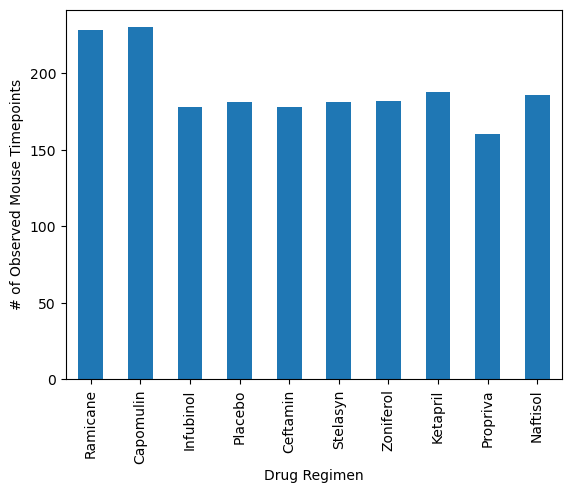

In [44]:
# make a dataframe from the 2 arrays
data_count_df = pd.DataFrame({'Drug Regimen': drugs, 'Count': counts})

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data_count_df.plot.bar('Drug Regimen', 'Count', rot=90, legend = False)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

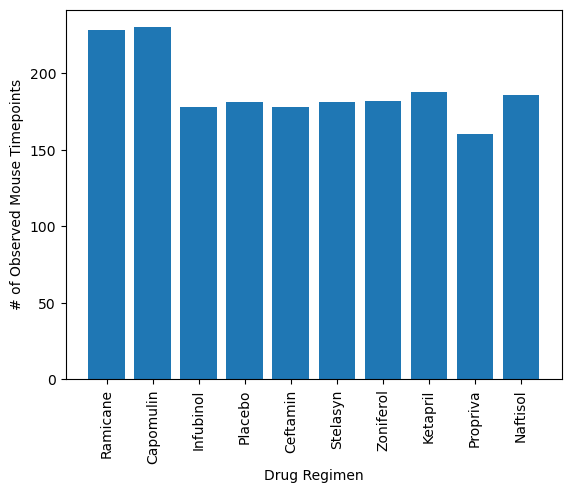

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drugs,counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show


In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#filter by gender and count
sex_types = clean_df["Sex"].unique()

# using a for loop to count the number of rows for each gender, stored in sex_num
sex_num = []
for sex_type in sex_types:
    num = (clean_df['Sex'] == sex_type).sum()
    sex_num.append(num)
sex_num

sex_count_df = pd.DataFrame({"Sex": sex_types,"Number":sex_num})
total_male = sex_count_df.iloc[0,1] 
total_female = sex_count_df.iloc[1,1]
total_sex = total_male + total_female

sex_count_df["Percent"]=sex_count_df["Number"]/total_sex *100
sex_count_df

,Sex,Number,Percent
0,Male,958,50.634249
1,Female,934,49.365751


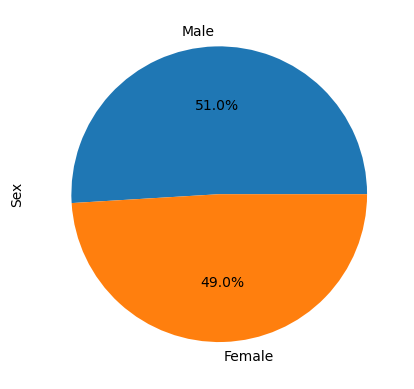

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
only_capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
only_ramicane = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:]
only_infubinol = clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:]
only_ceftamin = clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
cap_max_values = only_capomulin.groupby('Mouse ID')['Timepoint'].max()

ram_max_values = only_ramicane.groupby('Mouse ID')['Timepoint'].max()

inf_max_values = only_infubinol.groupby('Mouse ID')['Timepoint'].max()

cef_max_values = only_ceftamin.groupby('Mouse ID')['Timepoint'].max()

cap_max_values.head()
        
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
Name: Timepoint, dtype: int64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


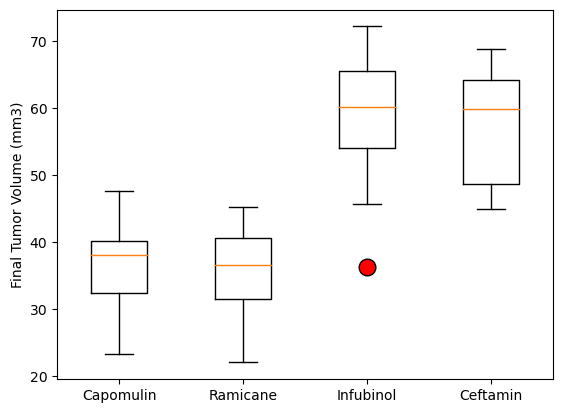

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

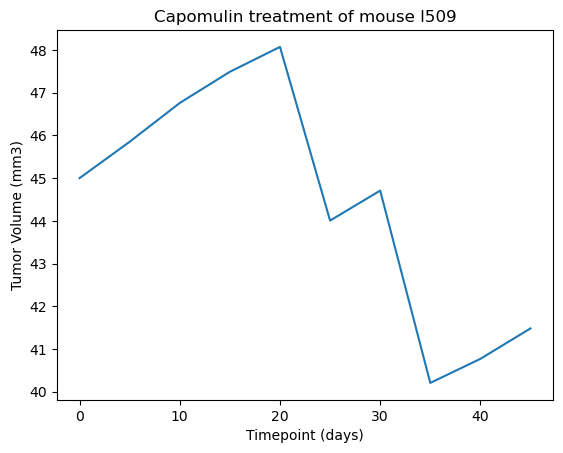

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


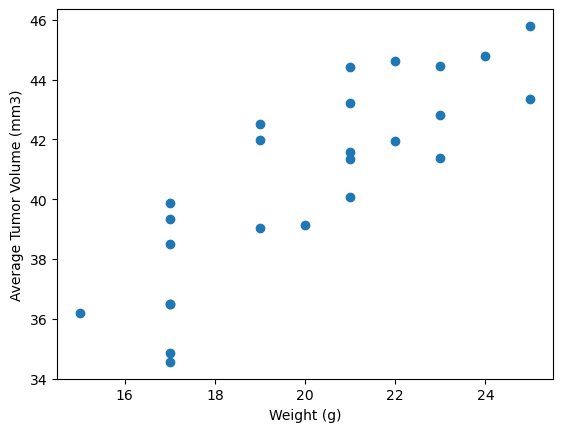

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


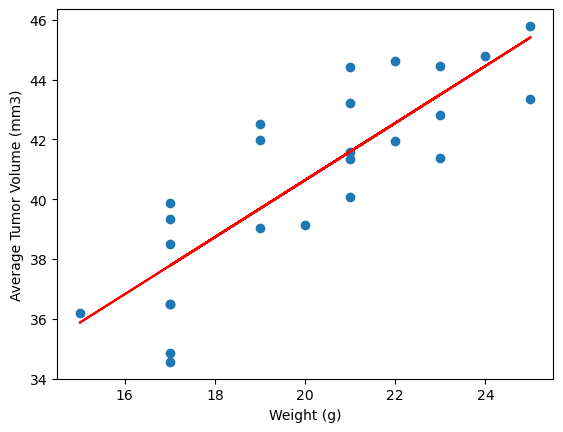

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
